In [369]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
import os
import numpy as np
import pandas as pd
import scipy

from sklearn.preprocessing import MinMaxScaler, StandardScaler
np.set_printoptions(precision=3, suppress=True)
pd.set_option("display.precision", 2)



In [2]:
import os
#data_file_path = os.path.join(os.path.dirname(__file__), "YX.csv")
data_file_path = os.path.join(os.getcwd(), "Data\YX.csv")
#data_file_path = os.path.join(os.getcwd(), "Compustat.csv")

In [3]:
import pandas as pd
RData = pd.read_csv(data_file_path)
finalData=RData
finalData


# finalData = dataset.map(..., num_parallel_calls=10)
# finalData = dataset.prefetch(buffer_size)

,gvkey,returns,MktCap,accdq,acoq,acoxq,actq,ancq,aoq,apq,...,xoproq,xoprq,xsgaq,loc,city,naics,acctstdq,compstq,fdateYQ,Split
0,1166,2.15,1.06e+09,67.03,47.30,47.30,688.73,217.91,90.33,103.62,...,17.51,162.50,26.64,NLD,Almere,333242,US,AC,2010.25,Train
1,1166,-9.88,1.08e+09,113.13,55.80,55.80,817.55,274.27,121.39,130.41,...,12.80,204.12,28.84,NLD,Almere,333242,DI,AC,2010.50,Train
2,1166,52.04,9.77e+08,87.28,70.52,70.52,839.32,253.31,89.55,158.81,...,20.81,236.26,37.26,NLD,Almere,333242,US,NaN,2010.75,Train
3,1166,7.98,1.49e+09,63.87,67.97,67.97,934.15,279.97,82.03,170.55,...,22.30,238.38,34.28,NLD,Almere,333242,US,NaN,2011.00,Train
4,1166,-1.52,1.09e+09,284.12,82.15,82.15,1216.41,345.56,121.44,199.13,...,20.68,354.20,46.94,NLD,Almere,333242,DI,AC,2011.50,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84654,354201,-4.18,2.56e+09,43.43,70.27,70.27,411.87,284.55,89.80,91.58,...,6.37,155.68,22.96,CHN,Xi'an,325320,DS,NaN,2022.50,Test
84655,354202,-30.46,8.15e+09,125.25,65.78,64.42,1373.60,401.53,107.88,369.75,...,39.22,332.73,88.88,CHN,Dongguan,334511,DS,NaN,2022.50,Test
84656,354265,-5.09,1.49e+11,2689.11,395.89,395.89,7093.88,3513.18,1364.98,1373.22,...,240.70,1350.14,329.32,CHN,Shanghai,334510,DS,NaN,2022.50,Test
84657,354276,14.71,NaN,406.26,189.52,189.52,9830.05,1906.21,959.38,461.40,...,201.28,1073.40,324.77,CHN,Shenzhen,339112,ND,NaN,2022.50,Test


In [373]:
# import dask.dataframe
# finalData = dask.dataframe.read_csv(data_file_path)
# finalData
#finalData.dtypes


In [6]:
# trainY = finalData["returns"][0:20].compute()
# trainY
# trainX = finalData.loc[:, finalData.columns != "returns"]
# trainX

import numpy as np


factorCols = ["gvkey", "fdateYQ", "naics", "loc", "city",
              "acctstdq", "compstq", #"bsprq", "scfq", "staltq", 
              "Split"]



finalData[factorCols] = finalData[factorCols].astype("category")


nonNumCols = ["returns", "MktCap"] + factorCols
numCols     = finalData.columns.difference(nonNumCols)


#finalData["fdateq"] = pd.to_datetime(finalData["fdateq"], format = "%Y%m%d")
#finalData["datadate"] = pd.to_datetime(finalData["datadate"], format = "%Y%m%d")
#finalData["fdateYQ"] = pd.to_datetime(finalData["fdateYQ"], format = "%Y%q") #check quarter format


# #Currently not grouped by quarter
# finalData = finalData.sort_values(by=['datacqtr', "fdateq"])

# trainSize = round(len(finalData.index)*0.4)
# validationSize = round(len(finalData.index)*0.7)




# Y = finalData["returns"]
# Y = np.asarray(Y).astype('float32')
# yTrain, yVal, yTest = Y[:trainSize], Y[trainSize:validationSize], Y[validationSize:]

# X = finalData.loc[:, finalData.columns != "returns"]



# X = X.select_dtypes(include=[np.number])
#X = X.dropna()





In [5]:
#xLogData = finalData[numCols].apply(lambda x: np.log(x+0.001))

finalData[numCols].apply(lambda x: (min(x), max(x)))
#finalData[numCols].apply(lambda x: max(x))

# plt.hist(xLogData, bins=1000)
# plt.show()

,accdq,acoq,acoxq,actq,ancq,aoq,apq,atq,capsq,ceqq,...,revtq,saleq,sctq,seqq,teqq,txtq,xintq,xoproq,xoprq,xsgaq
0,-2.645693e+03,-2.407562e+05,-244325.32,8.528000e-01,1.780000e-01,1.880000e-02,-2.293047e+04,2.967200e+00,-9.415402e+05,-6071255.0,...,-1.132707e+07,-1.132707e+07,0.00,-6071255.0,-7359210.0,-1572007.858,-1.098312e+04,-25794.36,-1.194063e+07,-83.068
1,2.751800e+07,4.209228e+07,42057082.00,1.753160e+08,2.345640e+08,1.477390e+08,4.046100e+07,3.925230e+08,2.399071e+08,183839000.0,...,8.436741e+07,8.436741e+07,44729227.06,183839000.0,232083000.0,5309476.000,1.733848e+06,8234000.00,8.421185e+07,6724665.000


In [ ]:
#X.dtypes

#finalData.info(verbose=True)
#finalData[numCols].info(verbose=True)
#finalData.dtypes
#print(finalData.dtypes)
#finalData.columns

#a = pd.get_dummies(finalData, columns = factorCols)
#b = pd.get_dummies(finalData, columns = "gvkey")

#a.iloc[1,:].tail(30)

In [7]:
#Ratio data
#xRatioData = finalData.apply(lambda x: x/finalData["revtq"])
xRatioData = finalData

xRatioData[numCols] = finalData[numCols].div(finalData["MktCap"].values, axis=0)
#xRatioData[numCols] = finalData[numCols].apply(lambda x: x/finalData["MktCap"].values, axis=0)
#xRatioData = X.div(finalData["MktCap"].values, axis=0)
#xRatioData = xRatioData.loc[:, xRatioData.columns != "MktCap"]


#xRatioData = xRatioData.dropna()
#xRatioData


In [ ]:
#xLogData = xRatioData["revtq"]
xLogData = finalData["revtq"].apply(lambda x: np.log(x+0.0001))

import matplotlib.pyplot as plt

plt.hist(xLogData, bins=1000)
plt.show()

In [9]:
#Winsorised data
import scipy


# XArray = np.asarray(xRatioData).astype('float32')
# # numberOfVariables = XArray.shape[1]

# xWinData = scipy.stats.mstats.winsorize(XArray, limits = (0.01, 0.01))
# #yWinData = scipy.stats.mstats.winsorize(XArray, limits = (0.01, 0.01))


xWinData=xRatioData

xWinData[numCols] = xRatioData[numCols].apply(lambda x: scipy.stats.mstats.winsorize(x, limits = (0.01, 0.01)))


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

# scaled_X = scaler.fit_transform(XArray)
# #scaled_X = np.apply_along_axis(func1d=scaler.fit_transform, axis=1, arr=X) #Why over rows??? prob axis=0 instead

# xTrain, xVal, xTest = scaled_X[:trainSize,:], scaled_X[trainSize:validationSize,:], scaled_X[validationSize:, :]

# scaled_winX = scaler.fit_transform(xWinData)
# xWinTrain, xWinVal, xWinTest = scaled_winX[:trainSize,:], scaled_winX[trainSize:validationSize,:], scaled_winX[validationSize:, :]


xScaledData=xWinData
#xScaledData[numCols] = xScaledData[numCols].apply(lambda x: scaler.fit_transform(x))
xScaledData[numCols] = scaler.fit_transform(xScaledData[numCols])





#scaled_X = scaled_X.apply(lambda x : x.reshape(-1, 1))
# droppedCols = ["ajexdi", "prccd", "trfd"]
# trainX.drop(droppedCols, axis=1, inplace=True)
# trainX['gvkey'] = trainX['gvkey'].astype(object)
# trainX['gvkey'] = trainX['gvkey'].astype(object)

#trainX.dtypes

In [ ]:
#import math
#xLogData = math.log(xRatioData["returns"])

#xLogData = np.log(xRatioData["returns"] + 105)

#xLogData = np.log1p(xRatioData["returns"]/105)

#xLogData = xRatioData[numCols].apply(lambda x: np.log(x), axis=1)
#xLogData = xRatioData["revtq"]
xLogData = xRatioData["revtq"].apply(lambda x: np.log(x+0.0001))


import matplotlib.pyplot as plt

plt.hist(xLogData, bins=100)
plt.show()

In [27]:
#ScaledWinsRatioPath = os.path.join(os.getcwd(), "Data\ScaledWinsRatioData.csv")


# XOutputDF = pd.DataFrame(scaled_winX)
# YOutputDF = pd.DataFrame(Y)

# NNReadyDataWithLabels = XOutputDF.append(finalData["fdateq"], finalData["datadate"], finalData["datacqtr"], YOutputDF)

#np.savetxt(ScaledWinsRatioPath, xScaledData, delimiter=",")
#pd.DataFrame(xScaledData).to_csv(ScaledWinsRatioPath, index=False)


In [ ]:
#tf.sparse.SparseTensor
import tensorflow as tf
from tensorflow import keras

np.set_printoptions(precision=3, suppress=True)
#tf.enable_eager_execution()

dataset = tf.data.experimental.make_csv_dataset(
    data_file_path, label_name="returns", batch_size=2, num_epochs=1,
    shuffle=False, sloppy=True) # compression_type = GZIP #ZLIB
iterator = dataset.as_numpy_iterator()

#dataset.zip()
#dataset
#iterator.next()

# for batch, label in dataset.take(1):
#   for key, value in batch.items():
#     print(f"{key:20s}: {value}")
#   print()
#   print(f"{'label':20s}: {label}")

#b = dataset.map(lambda x: x*2)


dummyLayer = tf.keras.layers.StringLookup(
    mask_token=None,
    encoding="utf-8",
    output_mode="one_hot",
    sparse=True
)

# dummyDataset = dataset.map(lambda x, y: (
#     {n: x[n] for n in numCols} | {f: dummyLayer.adapt(x[f]) for f in factorCols},
#     y))



# feature_ds = dataset.map(lambda x, y: x[name])
# feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
# # Learn the set of possible string values and assign them a fixed integer index
# lookup.adapt(feature_ds)



#dummyDataset = dataset.map(lambda x, y: ({f: x[f] for f in factorCols}))
#dummyDataset = dataset.map(lambda x, y: (x[f] for f in factorCols))
#dummyDataset = dataset.map(lambda x, y: x[factorCols])
#dummyDataset = dataset.map(lambda x, y: x["loc"])

#dummyDataset.batch(32)

#d = dummyLayer.adapt(dummyDataset)


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=False)
# ohe.fit_transform(dataset[['loc']])

dummyDataset = dataset.map(lambda x, y: ({f: ohe.fit_transform(x[f]) for f in factorCols}))


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['col1'])
dictionary_length = len(le.classes_)



#from sklearn.model_selection import TimeSeriesSplit
#tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)



# dummyLayer = tf.keras.layers.StringLookup(
#     mask_token=None,
#     encoding="utf-8",
#     output_mode="int"
# )

# dummyDataset = dataset.map(lambda x, y: (
#     {n: x[n] for n in numCols} | {f: dummyLayer(x[f]) for f in factorCols},
#     y))


# for batch, label in dummyDataset.take(1):
#   for key, value in batch.items():
#     print(f"{key:20s}: {value}")
#     print()
#     print(f"{'label':20s}: {label}")



# embeddedDummies = tf.keras.layers.Embedding(
#     input_dim=2000,
#     output_dim=10,
#     activity_regularizer=None,
#     mask_zero=True,
# )

# dummyModel = tf.keras.Sequential()
# dummyModel.add(embeddedDummies)

# with tf.device('cpu:0'):
#   embedding_layer = Embedding(...)
#   embedding_layer.build()


In [21]:
# data_file_path = os.path.join(os.getcwd(), "Data\YXWithSplit.csv")
# splittedData = pd.read_csv(data_file_path)

# #Currently not grouped by quarter
# splittedData = splittedData.sort_values(by=['datacqtr', "fdateq"])


# # trainSize = round(len(xScaledData.columns)*0.4)
# # validationSize = round(len(xScaledData.columns)*0.7)


split = xScaledData["Split"]
# xWinTrain, xWinVal, xWinTest = splittedData.loc[split=="Train", :], splittedData.loc[split=="Validation", :], splittedData.loc[split=="Test", :]


Y = xScaledData["returns"]
Y = np.asarray(Y).astype('float32')
yTrain, yVal, yTest = Y[split=="Train"], Y[split=="Validation"], Y[split=="Test"]




np.asarray(Y)
yTrain, yVal, yTest = Y[split=="Train"], Y[split=="Validation"], Y[split=="Test"]

# X = xScaledData.drop(["returns", "MktCap", "Split", "fdateYQ"], axis=1)
# X = X.drop(["gvkey", "naics", "loc", "city", "acctstdq", "bsprq", "compstq", "scfq", "staltq"], axis=1)
# #X = X.select_dtypes(include=[np.number])
# #X = pd.concat([X, dummies], axis=1)
# xWinTrain, xWinVal, xWinTest = X.loc[split=="Train", :], X.loc[split=="Validation", :], X.loc[split=="Test", :]

dummies = pd.get_dummies(xScaledData, dummy_na=False, sparse=False, drop_first=False,
                         columns=["naics", "loc", "city", "acctstdq", "compstq"])#, "bsprq", "scfq", "staltq"])  # , "bsprq", "scfq", "staltq"])
dummiesClean = dummies.drop(["returns", "MktCap", "Split", "fdateYQ", "gvkey"], axis=1) #, "staltq", "bsprq", "scfq"
xWinTrain, xWinVal, xWinTest = dummiesClean.loc[split=="Train", :], dummiesClean.loc[split=="Validation", :], dummiesClean.loc[split=="Test", :]

#xWinTrain, xWinVal, xWinTest = np.asarray(xWinTrain).astype('float32'), np.asarray(xWinVal).astype('float32'), np.asarray(xWinTest).astype('float32')

# xWinTrain, xWinVal, xWinTest = X[:trainSize, :], X[trainSize:validationSize, :], X[validationSize:, :]

In [14]:
pd.DataFrame.to_csv(dummies, "Data/dummiesData.csv", index=False)
#dummies.to_hdf(r"Data/dummiesData2.csv", key='dummies', mode='w')



In [23]:
#xWinTrain, xWinVal, xWinTest = np.asarray(xWinTrain).astype('float32'), np.asarray(xWinVal).astype('float32'), np.asarray(xWinTest).astype('float32')


# X = xScaledData.drop(["returns", "MktCap", "Split", "fdateYQ"], axis=1)
# X = X.drop(["gvkey", "naics", "loc", "city", "acctstdq", "bsprq", "compstq", "scfq", "staltq"], axis=1)
# X = pd.concat([X, dummies], axis=1)
# X.info(verbose=True)


dummiesClean.info(verbose=True)
namesOfAllPredictorsAndDummies = list(dummiesClean.columns)


#a = dummies.iloc[1:5,2975:]




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84659 entries, 0 to 84658
Data columns (total 2905 columns):
 #     Column                              Dtype  
---    ------                              -----  
 0     accdq                               float64
 1     acoq                                float64
 2     acoxq                               float64
 3     actq                                float64
 4     ancq                                float64
 5     aoq                                 float64
 6     apq                                 float64
 7     atq                                 float64
 8     capsq                               float64
 9     ceqq                                float64
 10    cheq                                float64
 11    cogsq                               float64
 12    cstkq                               float64
 13    dfxaq                               float64
 14    dlcq                                float64
 15    dlttq          

In [242]:
import tensorflow as tf
from tensorflow import keras

np.set_printoptions(precision=3, suppress=True)
#tf.enable_eager_execution()


#xScaledDataWithDummies = pd.concat([xScaledData, dummies], axis=1) 


#numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))
categorical_feature_names = factorCols
binary_feature_names = []

inputs = {}
for name, column in xScaledData.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)


preprocessed = []
for name in categorical_feature_names:
  vocab = sorted(set(xScaledData[name]))
  #print(f'name: {name}')
  #print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)


numeric_feature_names = numCols

def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(numeric_features)

numeric_inputs = {}
for name in numeric_feature_names:
  numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
#numeric_normalized = normalizer(numeric_inputs)

#preprocessed.append(numeric_normalized)
preprocessed.append(numeric_inputs)
#preprocessed

preprocessed_result = tf.concat(preprocessed, axis=-1)
#preprocessed_result

preprocessor = tf.keras.Model(inputs, preprocessed_result)

tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

preprocessor(dict(xScaledData.iloc[:1]))

xWinTrainDict, xWinValDict, xWinTestDict = xScaledData.loc[split=="Train", :], xScaledData.loc[split=="Validation", :], xScaledData.loc[split=="Test", :]
xWinTrainDict, xWinValDict, xWinTestDict = dict(xWinTrainDict), dict(xWinValDict), dict(xWinTestDict)
xWinTrainDict, xWinValDict, xWinTestDict = preprocessor(xWinTrainDict), preprocessor(xWinValDict), preprocessor(xWinTestDict)


# dataset = tf.data.experimental.make_csv_dataset(xScaledDataWithDummies, label_name="returns", batch_size=2, num_epochs=1,
#     shuffle=False, sloppy=True) # compression_type = GZIP #ZLIB
# iterator = dataset.as_numpy_iterator()


# inputs = {}
# for name, column in df.items():
#   if type(column[0]) == str:
#     dtype = tf.string
#   elif (name in categorical_feature_names or
#         name in binary_feature_names):
#     dtype = tf.int64
#   else:
#     dtype = tf.float32

#   inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)


In [ ]:
X.info(verbose=True)


In [29]:
# scaledWinsRatioPathWithSplit = os.path.join(os.getcwd(), "Data\ScaledWinsRatioDataWithSplit.csv")
# pd.DataFrame(xScaledData).to_csv(scaledWinsRatioPathWithSplit, index=False)


In [30]:

# groupedY = Y.groupby(["state", "gender"])["last_name"].count()
# yTrain, yVal, yTest = Y[:trainSize], Y[trainSize:validationSize], Y[validationSize:]



# groupedX = scaled_X.groupby(["state", "gender"])["last_name"].count()
# xTrain, xVal, xTest = scaled_X[:trainSize,:], scaled_X[trainSize:validationSize,:], scaled_X[validationSize:, :]




In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [32]:
# model = Sequential([
#     Dense(units=16,  activation='relu'), #input_shape=(, 10, numberOfVariables),
#     Dense(units=32, activation='relu'),
#     Dense(units=1)
# ])


In [33]:
# model = tf.keras.Sequential()

# model.add(Dense(units=10,  activation='relu'))
# model.add(tf.keras.layers.Dropout(.5))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=1))

In [34]:
# model.compile(optimizer="sgd",  # Adam(learning_rate=0.0001),
#               loss="MeanSquaredError", #'tf.keras.losses.MeanSquaredError()',
#               metrics=['accuracy'])

In [35]:
# model.fit(x=xTrain, y=yTrain,
#           batch_size=10, epochs=30, verbose=2)


In [36]:
# loss_and_metrics = model.evaluate(xVal, yVal, batch_size=128)

# model.predict(xVal, batch_size=128)

In [111]:
def NNfunction(modelType, layers, hidUnits, actvFunc, dropout, L1, L2):
    

    patience = 3
    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True) #Can this be taken out from the loop? => Less computing

    #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
    #callback = tf.keras.callbacks.BackupAndRestore(backup_dir="/tmp/backup")


    model = tf.keras.Sequential()

    if modelType == "LSTM":
        model.add(tf.keras.layers.LSTM(units=hidUnits, input_shape=(2,)))
    elif modelType == "GRU":
        model.add(tf.keras.layers.GRU(units=hidUnits))
    elif modelType == "SimpleRNN":
        # keras.layers.SimpleRNN(1, input_shape=[None, 1])
        model.add(tf.keras.layers.SimpleRNN(units=hidUnits))
    elif modelType == "RegularizedLinear":
        model.add(Dense(units=1,
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=L1, l2=L2)))
    elif modelType == "StandardLinear":
        model.add(Dense(units=1))
    elif modelType == "NaiveFirmMeanForecast":
        model.add(Dense(units=1, 
                        kernel_constraint = tf.keras.constraints.MinMaxNorm(
                            min_value=0, 
                            max_value=0, 
                            rate=1.0, 
                            axis=0)))
    else:
        try:
            for n in range(0, layers):
                model.add(Dense(units=hidUnits,
                                activation=actvFunc,
                                kernel_regularizer=tf.keras.regularizers.L1L2(l1=L1, l2=L2)))
                model.add(tf.keras.layers.Dropout(dropout))
                # scaler.fit_transform
                # tf.keras.layers.BatchNormalization(
        except:
            model.add(Dense(units=hidUnits, activation=actvFunc,
                            kernel_regularizer=tf.keras.regularizers.L1L2(l1=L1, l2=L2)))
            model.add(tf.keras.layers.Dropout(dropout))

            
        model.add(Dense(units=1))



    model.compile(optimizer="RMSprop",  # Adam(learning_rate=0.0001) #RMSprop #sgd
                  loss="MeanAbsoluteError",  # 'tf.keras.losses.MeanSquaredError()'  #Huber   #MeanAbsoluteError     #MeanSquaredError
                  metrics=["MeanSquaredError", "MeanAbsoluteError"]) #accuracy




    # model.fit(x=xTrain, y=yTrain,
    #           batch_size=16, epochs=epo, verbose=2)

    #loss_and_metrics = model.evaluate(xVal, yVal, batch_size=128)
    


    history = model.fit(x=xWinTrain, y=yTrain,
              batch_size=32, epochs=300,
              callbacks=[callback], verbose=2, validation_data = (xWinVal, yVal))

    # history = model.fit(x=xWinTrainDict, y=yTrain,
    #           batch_size=16, epochs=300,
    #           callbacks=[callback], verbose=1, validation_data = (xWinValDict, yVal))

    loss_and_metrics = model.evaluate(xWinVal, yVal, batch_size=32)
    
    epochs_EarlyStopping = len(history.history['loss']) - patience
    #history.history[]




    # quarters = len(yVal)
    # CV = []
    # for q in range(0, quarters):

    #     model.fit(x=xTrain, y=yTrain,
    #           batch_size=16, epochs=epo, verbose=2)

    #     validationError = model.evaluate(xVal, yVal, batch_size=128)
    #     CV = [CV, validationError]


    
    
    try:
        loss_and_metrics = [x for x in loss_and_metrics]
    except:     
        print(loss_and_metrics)

    return loss_and_metrics, model, epochs_EarlyStopping

    #model.predict(xVal, batch_size=128)

    





In [112]:
#Hyper-Parameters
NNModelType = {"FeedForward"} #, "LSTM", "GRU"}
hiddenLayers = {2, 3, 4, 5}
hiddenUnits = {2, 3, 4, 5, 10}
activationFunc = {"linear", "relu", "sigmoid", "tanh"} #etc. https://keras.io/api/layers/activations/ , "selu"
dropOut = {0, 0.1, 0.3, 0.5, 0.7}
#epochs = [100] #Just choose best model. => Run for 100 epochs, but if 20th epoch is the best, choose it, i.e. early stopping
#inputSize = numberOfVariables #ncol(trainXPools[[1]])
#other parameters: loss func, node structure, location of the regularization function
batchSize = {8, 16, 32, 64}
optim = {"RMSprop", "Adam", "sgd"}


none = {None}

L1L2Grid = 10**np.linspace(start=2, stop=-6, num=5) #3 and -10
L1L2Grid = set(np.append(0, L1L2Grid))

StandardLinearParams = {"Model type": {"StandardLinear"},
               "Hidden layers": none,
               "Hidden units": none,
               "Activation function": none,
               "Dropout": none,
               "L1": {0},
               "L2": {0}
               }

LinearParams = {"Model type": {"RegularizedLinear"},
               "Hidden layers": none,
               "Hidden units": none,
               "Activation function": none,
               "Dropout": none,
               "L1": L1L2Grid,
               "L2": L1L2Grid
               }
               
NNParams = {"Model type": NNModelType,  # , "LSTM", "GRU"},
            "Hidden layers": hiddenLayers,
            "Hidden units": hiddenUnits,
            "Activation function": activationFunc,
            "Dropout": dropOut,
            "L1": L1L2Grid,
            "L2": L1L2Grid
            }

NaiveFirmMeanParams = {"Model type": {"NaiveFirmMeanForecast"},
               "Hidden layers": none,
               "Hidden units": none,
               "Activation function": none,
               "Dropout": none,
               "L1": {0},
               "L2": {0}
               }

NaiveMeanParams = {"Model type": {"NaiveMeanForecast"},
               "Hidden layers": none,
               "Hidden units": none,
               "Activation function": none,
               "Dropout": none,
               "L1": {0},
               "L2": {0}
               }

NaiveZeroParams = {"Model type": {"NaiveZeroForecast"},
               "Hidden layers": none,
               "Hidden units": none,
               "Activation function": none,
               "Dropout": none,
               "L1": {0},
               "L2": {0}
               }

import itertools
import pandas as pd
NNGrid = pd.DataFrame(itertools.product(
    *NNParams.values()), columns=NNParams.keys())

linearGrid = pd.DataFrame(itertools.product(
    *LinearParams.values()), columns=LinearParams.keys())

StandardLinearGrid = pd.DataFrame(itertools.product(
    *StandardLinearParams.values()), columns=StandardLinearParams.keys())

NaiveFirmMeanGrid = pd.DataFrame(itertools.product(
    *NaiveFirmMeanParams.values()), columns=NaiveFirmMeanParams.keys())

NaiveMeanGrid = pd.DataFrame(itertools.product(
    *NaiveMeanParams.values()), columns=NaiveMeanParams.keys())

NaiveZeroGrid = pd.DataFrame(itertools.product(
    *NaiveZeroParams.values()), columns=NaiveZeroParams.keys())


#Random grid search
#import random
#random.seed(2302)
#OLSGrid = linearGrid.iloc[0]
#OLSGrid = StandardLinearGrid
randomLinearGrid = linearGrid.drop(0).sample(n=10)
randomNNGrid = NNGrid.sample(n=50)

HPGrid = pd.concat([StandardLinearGrid, randomLinearGrid, randomNNGrid])
#HPGrid = pd.concat([linearGrid, randomNNGrid])


# hyperParams = np.concatenate((LinearParams, NNParams, RNNParams))
#hyperParams = np.concatenate(grid, LinearParams)




In [113]:
#Naive Zero
zeroForecastMSE = sum(yVal**2)/len(yVal)
zeroForecastMAE = sum(abs(yVal))/len(yVal)

NaiveZeroGrid.loc[:,"Epochs"] = None
NaiveZeroGrid.loc[:,"MAE"] = zeroForecastMAE
NaiveZeroGrid.loc[:,"MSE"] = zeroForecastMSE
NaiveZeroGrid.loc[:,"ModelPointer"] = None

#Naive Mean
naiveMean = sum(yTrain)/len(yTrain)
meanForecastMSE = sum((yVal-naiveMean)**2)/len(yVal)
meanForecastMAE = sum(abs(yVal-naiveMean))/len(yVal)

NaiveMeanGrid.loc[:,"Epochs"] = None
NaiveMeanGrid.loc[:,"MAE"] = meanForecastMAE
NaiveMeanGrid.loc[:,"MSE"] = meanForecastMSE
NaiveMeanGrid.loc[:,"ModelPointer"] = None

#Naive FirmMean
naiveFirmMean = finalData.loc[split=="Train", ["gvkey", 'returns']].groupby(['gvkey'])['returns'].mean()

naiveFirmMeanDF = pd.merge(naiveFirmMean, finalData.loc[split == "Validation", ["gvkey", 'returns']],
                           on="gvkey", suffixes=('_pred', '_real'))

naiveFirmError = naiveFirmMeanDF["returns_pred"] - naiveFirmMeanDF["returns_real"]
naiveFirmError = naiveFirmError.dropna() #I should maybe instead drop all firms without historical observations. Otherwise the models are not comparable. There will be a bias
firmMeanForecastMSE = sum(naiveFirmError**2)/len(yVal)
firmMeanForecastMAE = sum(abs(naiveFirmError))/len(yVal)

NaiveFirmMeanGrid.loc[:,"Epochs"] = None
NaiveFirmMeanGrid.loc[:,"MAE"] = firmMeanForecastMAE
NaiveFirmMeanGrid.loc[:,"MSE"] = firmMeanForecastMSE
NaiveFirmMeanGrid.loc[:,"ModelPointer"] = None

In [114]:
MSEMatrix = pd.DataFrame()
pd.options.mode.chained_assignment = None
#np.set_printoptions(precision=3, suppress=True)
pd.set_option("display.precision", 2)

MSEMatrix = pd.concat((MSEMatrix, NaiveZeroGrid, NaiveMeanGrid, NaiveFirmMeanGrid), axis=0)

#validationSize = 2 #length(validXPools)
#HPsize = len(hyperParams.index)
HPsize = np.shape(HPGrid)[0]
#HPsize = 1   #176 models took 40 min

for n in range(0, HPsize):
  print("\n")
  print("Model ", str(n+1), " out of ", str(HPsize))

  HP = HPGrid.iloc[n]
  CV = NNfunction(*HP)

  #a = pd.DataFrame([CV])
  newMSE = HPGrid.iloc[[n]]

  MSE = CV[0][1]
  MAE = CV[0][2]
  Epochs = CV[2]
  ModelPointer = CV[1]

  # newMSE['MSE'] = MSE
  # newMSE['MAE'] = MAE

  newMSE.loc[:,"Epochs"] = Epochs
  newMSE.loc[:,"MSE"] = MSE
  newMSE.loc[:,"MAE"] = MAE
  newMSE.loc[:,"ModelPointer"] = ModelPointer

  MSEMatrix = pd.concat((MSEMatrix, newMSE), axis=0)
  
  # newMSE = a.join(b)
  # newMSE2 = pd.concat([b, a])
  #newMSE = pd.concat([b, a], axis=1, ignore_index=True, sort=False)
  #newMSE =  pd.concat(HPGrid.iloc[[n]], CV)
  #newMSE = np.concatenate((HP, CV))
  #MSEMatrix = np.concatenate((MSEMatrix, newMSE))
  #MSEMatrix = pd.concat(MSEMatrix, newMSE)
  #MSEMatrix = pd.concat([MSEMatrix, [HP, CV]])

finalResults = MSEMatrix

#finalResults[:,-1] = apply(finalResults[,-1], MARGIN=2, FUN=as.numeric)
#finalResults = finalResults[order(finalResults[,"MSE"]),]
#finalResults <- apply(finalResults, 2, as.character)

#write.csv2(finalResults, "results3.csv", row.names = FALSE)


#pd.DataFrame.to_csv(MSEMatrix, "resultsPython.csv")


#finalResults = finalResults[order(finalResults[,"MSE"]),]

formattedMSEMatrix = finalResults.sort_values(by=["MSE"], axis = 0)
formattedMSEMatrix




Model  1  out of  61
Epoch 1/300
1056/1056 - 9s - loss: 14.5617 - mean_squared_error: 550.9365 - mean_absolute_error: 14.5617 - val_loss: 13.8039 - val_mean_squared_error: 424.2809 - val_mean_absolute_error: 13.8039 - 9s/epoch - 9ms/step
Epoch 2/300
1056/1056 - 6s - loss: 14.4667 - mean_squared_error: 543.2857 - mean_absolute_error: 14.4667 - val_loss: 13.9100 - val_mean_squared_error: 426.0352 - val_mean_absolute_error: 13.9100 - 6s/epoch - 6ms/step
Epoch 3/300
1056/1056 - 6s - loss: 14.4326 - mean_squared_error: 540.2100 - mean_absolute_error: 14.4326 - val_loss: 13.9837 - val_mean_squared_error: 427.2672 - val_mean_absolute_error: 13.9837 - 6s/epoch - 5ms/step
Epoch 4/300
Restoring model weights from the end of the best epoch: 1.
1056/1056 - 6s - loss: 14.4076 - mean_squared_error: 537.8914 - mean_absolute_error: 14.4076 - val_loss: 14.0423 - val_mean_squared_error: 428.6994 - val_mean_absolute_error: 14.0423 - 6s/epoch - 6ms/step
Epoch 4: early stopping
704/704 [=================

,Model type,Hidden layers,Hidden units,Activation function,Dropout,L1,L2,Epochs,MAE,MSE,ModelPointer
3569,FeedForward,2,10,tanh,0.7,0.00e+00,1.00e-06,1,13.80,423.74,<keras.engine.sequential.Sequential object at ...
18,RegularizedLinear,None,None,None,NaN,1.00e-02,0.00e+00,1,13.77,423.96,<keras.engine.sequential.Sequential object at ...
21,RegularizedLinear,None,None,None,NaN,1.00e-02,1.00e-02,1,13.78,424.05,<keras.engine.sequential.Sequential object at ...
22,RegularizedLinear,None,None,None,NaN,1.00e-02,1.00e-04,1,13.78,424.07,<keras.engine.sequential.Sequential object at ...
3,RegularizedLinear,None,None,None,NaN,0.00e+00,1.00e-02,1,13.79,424.13,<keras.engine.sequential.Sequential object at ...
...,...,...,...,...,...,...,...,...,...,...,...
7051,FeedForward,3,10,tanh,0.0,1.00e-06,1.00e+00,1,13.94,428.91,<keras.engine.sequential.Sequential object at ...
7044,FeedForward,3,10,tanh,0.0,1.00e-04,0.00e+00,1,14.03,429.28,<keras.engine.sequential.Sequential object at ...
3377,FeedForward,2,10,linear,0.3,1.00e-04,1.00e-06,1,14.17,430.72,<keras.engine.sequential.Sequential object at ...
0,NaiveMeanForecast,None,None,None,NaN,0.00e+00,0.00e+00,None,14.84,448.58,None


In [58]:
formattedMSEMatrix = finalResults.sort_values(by=["MAE"], axis = 0)
formattedMSEMatrix

,Model type,Hidden layers,Hidden units,Activation function,Dropout,L1,L2,Epochs,MAE,MSE,ModelPointer
0,NaiveZeroForecast,NA,NA,NA,NA,0.0,0.0,NA,13.810805,432.121124,NA
624,Forward,5,4,tanh,0.5,0.0,0.0,4,13.850760,430.215515,<keras.engine.sequential.Sequential object at ...
180,Forward,3,2,relu,0.5,0.0,0.0,4,13.891668,432.871857,<keras.engine.sequential.Sequential object at ...
0,NaiveMeanForecast,NA,NA,NA,NA,0.0,0.0,4,13.901621,433.258362,<keras.engine.sequential.Sequential object at ...
12,Forward,2,2,tanh,0.5,0.0,0.0,4,13.974962,432.659027,<keras.engine.sequential.Sequential object at ...
104,Forward,2,4,sigmoid,0.2,0.0,0.0,5,14.001399,433.381195,<keras.engine.sequential.Sequential object at ...
656,Forward,5,5,relu,0.2,0.0,0.0,5,14.032434,433.440063,<keras.engine.sequential.Sequential object at ...
128,Forward,2,5,tanh,0.2,0.0,0.0,4,14.043228,432.868164,<keras.engine.sequential.Sequential object at ...
0,Linear,NA,NA,NA,NA,0.0,0.0,4,14.068347,434.006866,<keras.engine.sequential.Sequential object at ...
516,Forward,4,10,tanh,0.5,0.0,0.0,4,14.071392,434.145203,<keras.engine.sequential.Sequential object at ...


In [118]:
#MSEMatrix

kerasModelResults = finalResults.dropna(subset = ["ModelPointer"])
kerasModelResults = kerasModelResults.reset_index()
index = kerasModelResults['MSE'].idxmin()
#bestParams = finalResults.iloc[index][:-3]
#bestModel = finalResults(*bestParams)[1]
#bestParams = finalResults[finalResults['MSE']==finalResults['MSE'].min()]

for i in range(5):
    bModel = kerasModelResults.iloc[i+1]["ModelPointer"]
    modelPath = "Results/BestKerasModel" + str(i + 1)
    bModel.save(modelPath)


# # xTrainValiPooled = scaled_X[:validationSize,:]
# # yTrainValiPooled = Y[:validationSize]

# #xTrainValiPooled = scaled_X[:validationSize,:]
# #xTrainValiPooled = X.loc[split!="Test", :]
# xTrainValiPooled = dummiesClean.loc[split!="Test", :]
# #yTrainValiPooled = Y[:validationSize]
# yTrainValiPooled = Y[split!="Test"]

# #bestModel = bestParams["ModelPointer"]
# bestModel = kerasModelResults.iloc[index]["ModelPointer"]

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# history = bestModel.fit(x=xTrainValiPooled, y=yTrainValiPooled,
#                         batch_size=32, epochs=100,
#                         callbacks=[callback], verbose=2, validation_split=0.5)




# #bestModel.save('Results/BestKerasModel10')


# bModel = kerasModelResults.iloc[index]["ModelPointer"]
# modelPath = "Results/BestKerasModels/1"
# bModel.save(modelPath)



INFO:tensorflow:Assets written to: Results/BestKerasModel1\assets
INFO:tensorflow:Assets written to: Results/BestKerasModel2\assets
INFO:tensorflow:Assets written to: Results/BestKerasModel3\assets
INFO:tensorflow:Assets written to: Results/BestKerasModel4\assets
INFO:tensorflow:Assets written to: Results/BestKerasModel5\assets


In [71]:
bestPredictions = bestModel.predict(x=xWinTest)


944/944 [==============================] - 15s 6ms/step


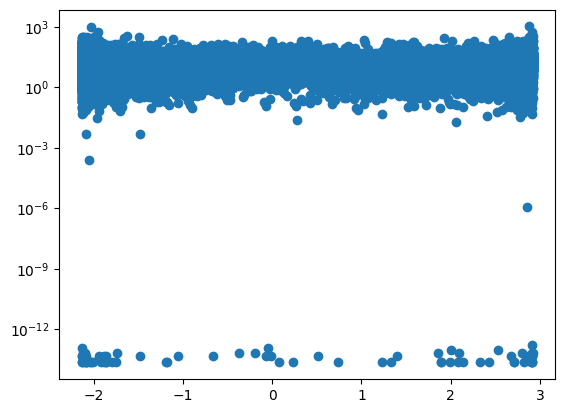

ValueError: shapes (30181,1) and (30181,) not aligned: 1 (dim 1) != 30181 (dim 0)

In [72]:
import matplotlib.pyplot as plt
plt.scatter(bestPredictions, yTest)
#plt.xscale("log")
plt.yscale("log")
plt.show()

from scipy.stats import pearsonr
corr, _ = pearsonr(bestPredictions, yTest)

In [42]:
# resPath = "C:\\Users\RobinForMLThesis\\OneDrive - Hanken Svenska handelshogskolan\\Master's_Thesis\\DataAnalysis\\resultsPython.csv"

# finalResults = pd.DataFrame(MSEMatrix)
# pd.DataFrame.to_csv(finalResults, resPath)
# #pd.DataFrame.to_csv(finalResults, "resultsPython.csv")

# MSEMatrix.tofile(resPath, sep = ',')

# finalResults

In [117]:
formattedMSEMatrix = MSEMatrix.drop(["ModelPointer"], axis=1)
formattedMSEMatrix = formattedMSEMatrix.sort_values(by=["MSE"], axis = 0)
#formattedMSEMatrix[["L1", "L2"]] = round(formattedMSEMatrix[["L1", "L2"]], 1)
#formattedMSEMatrix = round(formattedMSEMatrix, 1)

def RobRound(x): 
    return np.format_float_positional(x, precision=2, unique=False, fractional=False, trim='-')


formattedMSEMatrix["L1"] = formattedMSEMatrix["L1"].apply(lambda x: RobRound(x))
formattedMSEMatrix["L2"] = formattedMSEMatrix["L2"].apply(lambda x: RobRound(x))
formattedMSEMatrix["MSE"] = formattedMSEMatrix["MSE"].apply(lambda x: round(x))
formattedMSEMatrix["MAE"] = formattedMSEMatrix["MAE"].apply(lambda x: RobRound(x))


#pd.DataFrame.to_csv(MSEMatrix, "Results/ModelComparison.csv", index=False)
#pd.DataFrame.to_excel(MSEMatrix, "Results/ModelComparison.xlsx")
pd.DataFrame.to_html(formattedMSEMatrix, "Results/ModelComparison.html", index=False)

In [ ]:
#Variable importance



# VarImpData = np.asarray(xRatioData).astype('float32')
# VarImpData = scipy.stats.mstats.winsorize(VarImpData, limits = (0.05, 0.95))
# VarImpData = scaler.fit_transform(VarImpData)

rows = len(finalResults["ModelPointer"])
cols = len(xWinVal.columns)
zeroedXVal = np.array(xWinVal)

rows = 5

#VarImpResults = pd.DataFrame(columns = X.columns)
VarImpArray = np.empty((rows, cols), dtype=float, order='C')
normalMSEArray = np.empty((rows, 1), dtype=float, order='C')

for row in range(0, rows):
    
    model = finalResults["ModelPointer"][row]

    loss = model.evaluate(zeroedXVal, yVal, batch_size=128, verbose = 0)
    loss = [x for x in loss]
    normalMSE = loss[0]
    normalMSEArray[row, 0] = normalMSE

    for col in range(0, cols):

        # print("\n")
        # print("Model ", str(row+1), " out of ", str(rows))
        # print("Variable ", str(col+1), " out of ", str(cols))

        zeroedXVal[:,col] = 0
        #VarImpData[col].values[:] = 0
        loss = model.evaluate(zeroedXVal, yVal, batch_size=128, verbose = 0)
        zeroedXVal[:,col] = np.array(xWinVal[xWinVal.columns[col]])

        try:
            loss = [x for x in loss]
            VarImpMSE = loss[0]
            VarImpArray[row, col] = VarImpMSE
            print("Loss is %s on model %s variable %s" % (loss, row, col))
        except:     
            print("RobError!: Loss is %s on model %s variable %s" % (loss, row, col))



VarImpResults = pd.DataFrame(VarImpArray, columns = xWinVal.columns)
normalMSEArray = pd.DataFrame(normalMSEArray, columns = ["AllVariables"])

VarImpResults = pd.concat([VarImpResults, normalMSEArray], axis=1)

VarImpMean = VarImpResults.mean(axis=0)



In [ ]:
import pandas as pd
variableDescriptions = pd.read_excel(
    "Data/CompustatVariableDescriptions/VariableDescriptions.xlsx",
    header=2,
    index_col="N")

variableDescriptions["Variable Name"] = [n.strip() for n in variableDescriptions["Variable Name"]]

import re
variableDescriptions["ShortDescr"] = variableDescriptions["Description"].apply(lambda x : re.sub(r".*-- ", "", x))
#variableDescriptions["ShortDescr"] = variableDescriptions["ShortDescr"].apply(lambda x : re.sub(r" >.*", "", x))
#variableDescriptions["ShortDescr"] = variableDescriptions["ShortDescr"].apply(lambda x : re.sub(r" -.*", "", x))

variableDescriptions["ShortDescr"]

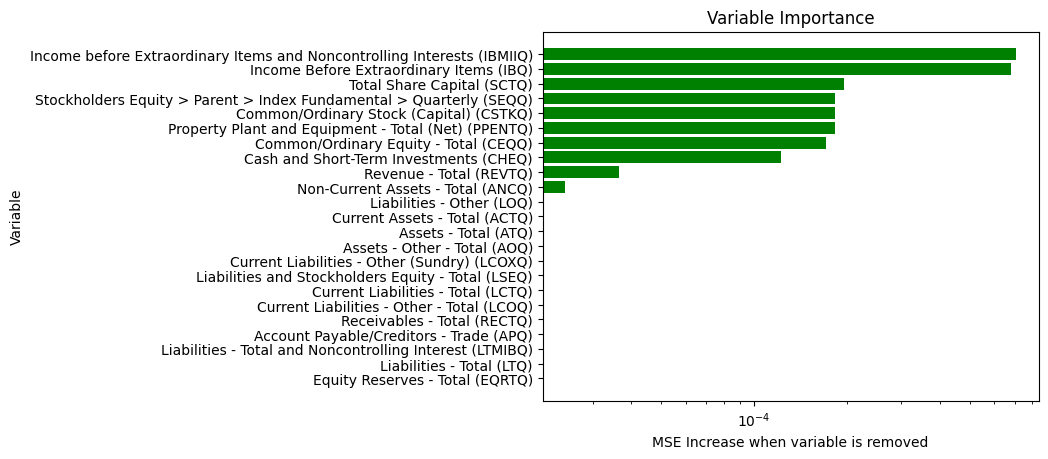

In [123]:
VarImpMean = VarImpResults.mean(axis=0)
VarImpMeanSorted = VarImpMean.sort_values(ascending=False)

VarImpMeanSorted = VarImpMeanSorted - VarImpMean["AllVariables"]

VarImpMeanSorted = VarImpMeanSorted.rename("MSE Increase")
VarImpMeanSorted.index = VarImpMeanSorted.index.str.upper()

VarImpMeanSorted = pd.merge(
    VarImpMeanSorted, variableDescriptions, left_index=True, right_on="Variable Name")

pd.DataFrame.to_html(VarImpMeanSorted, "Results/VariableImportance8.html", index=False)

VarImpMeanBest = VarImpMeanSorted[1:25]
# VarImpMeanScaled = VarImpMeanBest - VarImpMeanBest.mean()

import matplotlib.pyplot as plt

plt.barh(
    #VarImpMeanBest["Variable Name"], VarImpMeanBest["MSE Increase"], log=True, color="green")  # , height = 0.4)#, width, bottom=VarImpMean.min(), align)
    VarImpMeanBest["ShortDescr"], VarImpMeanBest["MSE Increase"], log=True, color="green")  # , height = 0.4)#, width, bottom=VarImpMean.min(), align)

plt.gca().invert_yaxis()  # labels read top-to-bottom


plt.title("Variable Importance")
plt.ylabel("Variable")
plt.xlabel("MSE Increase when variable is removed")
# plt.legend(['train', 'test'], loc='upper left')


plt.savefig("Results/VariableImportance8.png")
# from matplotlib.ticker import ScalarFormatter
# plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.show()


Epoch 1/300
676/676 - 4s - loss: 1987.6479 - mean_absolute_error: 20.3377 - val_loss: 2673.2761 - val_mean_absolute_error: 21.5853 - 4s/epoch - 5ms/step
Epoch 2/300
676/676 - 2s - loss: 1984.8063 - mean_absolute_error: 20.4015 - val_loss: 2667.5227 - val_mean_absolute_error: 21.5985 - 2s/epoch - 3ms/step
Epoch 3/300
676/676 - 3s - loss: 1982.5377 - mean_absolute_error: 20.4730 - val_loss: 2662.2070 - val_mean_absolute_error: 21.6164 - 3s/epoch - 4ms/step
Epoch 4/300
676/676 - 3s - loss: 1981.9677 - mean_absolute_error: 20.4623 - val_loss: 2662.0515 - val_mean_absolute_error: 21.6161 - 3s/epoch - 4ms/step
Epoch 5/300
676/676 - 2s - loss: 1979.8287 - mean_absolute_error: 20.4972 - val_loss: 2655.8665 - val_mean_absolute_error: 21.6415 - 2s/epoch - 4ms/step
Epoch 6/300
676/676 - 3s - loss: 1979.3455 - mean_absolute_error: 20.5257 - val_loss: 2657.9641 - val_mean_absolute_error: 21.6281 - 3s/epoch - 4ms/step
Epoch 7/300
676/676 - 2s - loss: 1978.1211 - mean_absolute_error: 20.5215 - val_lo

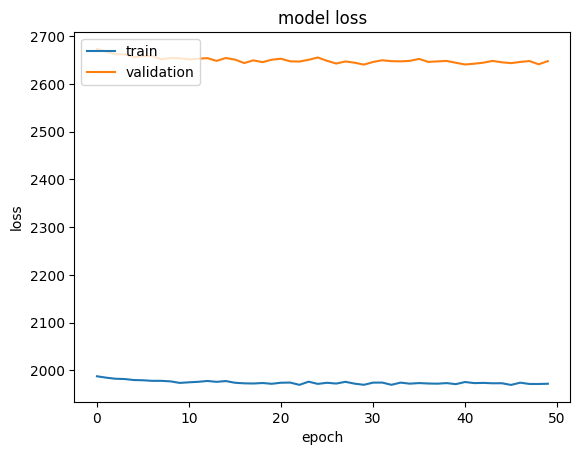

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


bestModel = keras.models.load_model('Results/BestKerasModel8')
#plot(model)


bestModel = tf.keras.Sequential()
bestModel.add(Dense(units=5, activation="relu"))
bestModel.add(tf.keras.layers.Dropout(0.3))
bestModel.add(Dense(units=5, activation="relu"))
bestModel.add(tf.keras.layers.Dropout(0.3))
bestModel.add(Dense(units=5, activation="relu"))
bestModel.add(tf.keras.layers.Dropout(0.3))
bestModel.add(Dense(units=5, activation="relu"))
bestModel.add(tf.keras.layers.Dropout(0.3))
bestModel.add(Dense(units=1))

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)


bestModel.reset_states()


compiledBestModel = bestModel.compile(optimizer="RMSprop",  # Adam(learning_rate=0.0001) #RMSprop #sgd
                                      loss="MeanSquaredError",  # 'tf.keras.losses.MeanSquaredError()',
                                      metrics=['MeanAbsoluteError'])

bestModel.reset_states()



#xTrainValiPooled = scaled_X[:validationSize,:]
xTrainValiPooled = X.loc[split=="Validation", :]
#yTrainValiPooled = Y[:validationSize]
yTrainValiPooled = Y[split=="Validation"]
history = bestModel.fit(x=xTrainValiPooled, y=yTrainValiPooled, batch_size=32,
                        epochs=300, verbose=2, validation_data=(xWinTest, yTest), callbacks = [callback])


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Results/LearningCurve9.png')
plt.show()


# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()




In [77]:
#Visualize network

bestModel = keras.models.load_model('Results/BestKerasModel8')

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

import pydot
import pydotplus
import graphviz

from ann_visualizer.visualize import ann_viz

ann_viz(bestModel, view=True, filename="Results/BestModel8", title="Best Model Visualized")




In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

bestModel = keras.models.load_model('Results/BestKerasModel7')




#Print summary
modelSummary = bestModel.summary()
print(modelSummary)


with open('Results/BestModelSummary7.html', 'w') as f:

    bestModel.summary(print_fn=lambda x: f.write(x + '\n'))




# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# import pydot
# import pydotplus
# import graphviz

# tf.keras.utils.plot_model(
#     bestModel,
#     to_file="Results/BestModel.png",
#     show_shapes=True,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="LR",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
# )



#pred = model.predict(xWinVal, batch_size=128)

#plt.scatter(pred, yVal)
#pred

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 86        
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#ynew = model.predict_classes(Xnew)

In [ ]:
#(Geron 2019, 76, 320)

#from sklearn import RandomizedSearchCV, GridSearchCV



#(Geron 2019, 76)
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)



grid_search.best_params_

grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)





#(Geron 2019, 320)


def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


keras_reg.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)




from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])


rnd_search_cv.best_params_
rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model








#Chollet: DL for Python
import kerastuner as kt





#strategy = tf.distribute.MirroredStrategy()





#If your search process crashes, you can always restart it—just specify overwrite=False in the tuner so that it can resume from the trial logs stored on disk.




